<a href="https://www.kaggle.com/code/sudhanshu2198/sales-prediction-using-prophet-and-pmdarima?scriptVersionId=92721525" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("../input/sales-forecasting/train.csv")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
data["date"]=pd.to_datetime(data["Order Date"],format="%d/%m/%Y",errors="coerce")

In [6]:
data=data.groupby("date").sum()[["Sales"]]
data.head()

,Sales
date,
2015-01-03,16.448
2015-01-04,288.060
2015-01-05,19.536
2015-01-06,4407.100
2015-01-07,87.158


In [7]:
data["day"]=data.index.day
data["month"]=data.index.month
data["year"]=data.index.year

In [8]:
data.head()

,Sales,day,month,year
date,,,,
2015-01-03,16.448,3,1,2015
2015-01-04,288.060,4,1,2015
2015-01-05,19.536,5,1,2015
2015-01-06,4407.100,6,1,2015
2015-01-07,87.158,7,1,2015


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"]=(12,8)

<AxesSubplot:xlabel='date'>

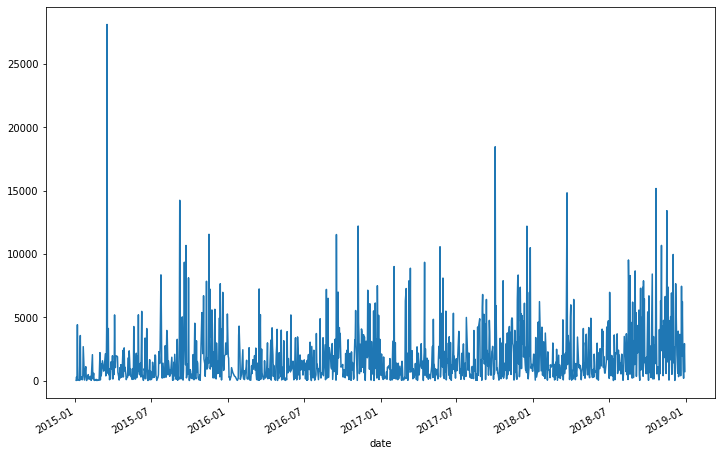

In [10]:
data["Sales"].plot()

<AxesSubplot:xlabel='date'>

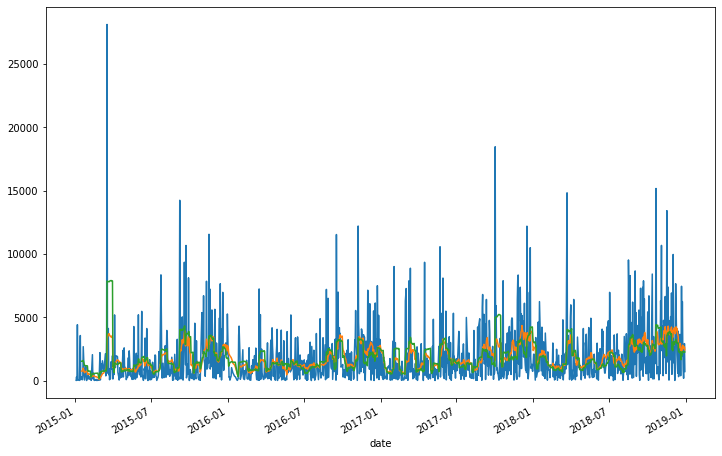

In [11]:
data["Sales"].plot()
data["Sales"].rolling(12).mean().plot()
data["Sales"].rolling(12).std().plot()

<AxesSubplot:xlabel='day', ylabel='Sales'>

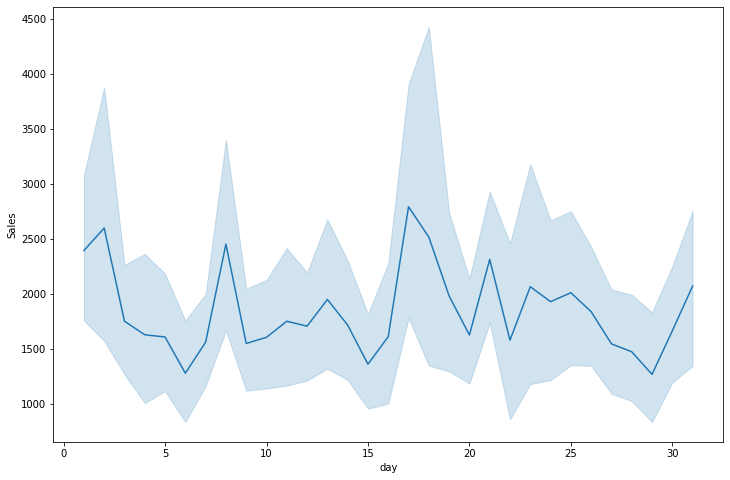

In [12]:
sns.lineplot(x="day",y="Sales",data=data)

<AxesSubplot:xlabel='month', ylabel='Sales'>

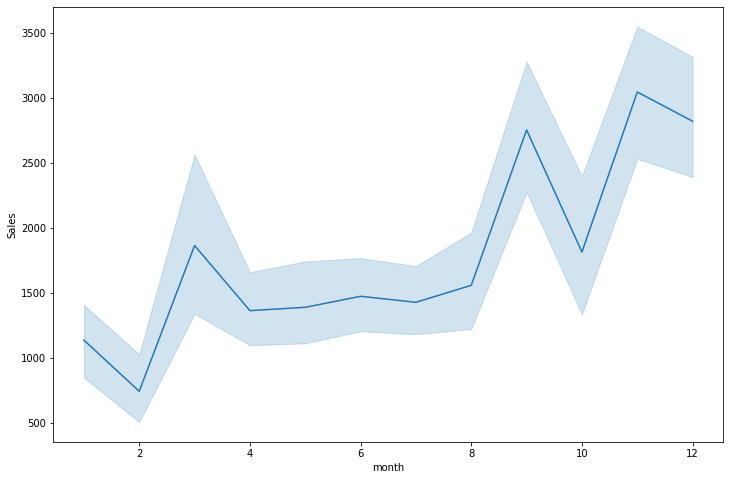

In [13]:
sns.lineplot(x="month",y="Sales",data=data)

<AxesSubplot:xlabel='year', ylabel='Sales'>

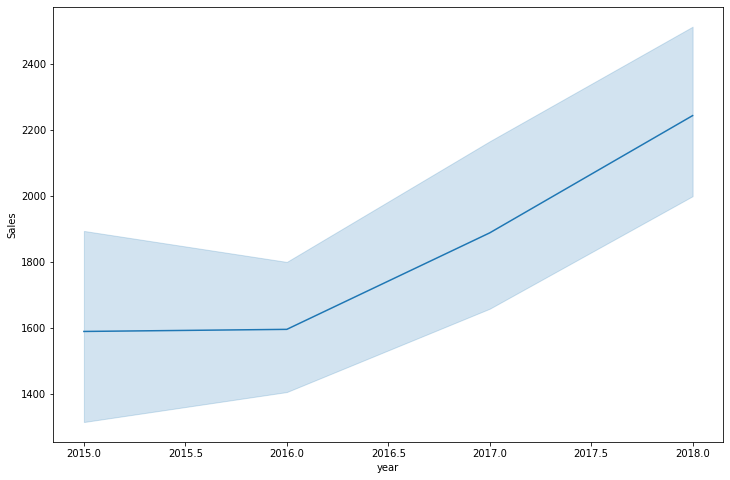

In [14]:
sns.lineplot(x="year",y="Sales",data=data)

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

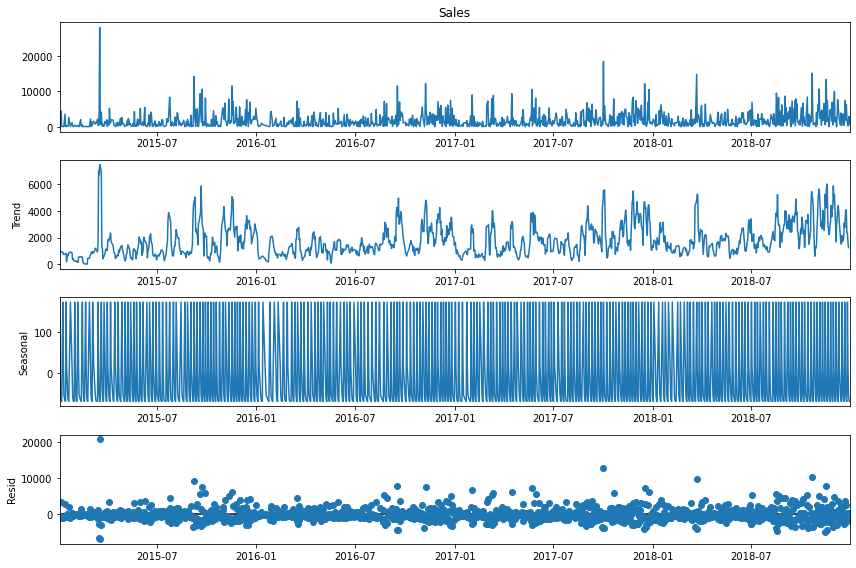

In [16]:
decompose=seasonal_decompose(data["Sales"],model='additive',period=5)
decompose.plot();

**PMD Arima**

In [17]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 532 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pmdarima as pm

In [19]:
model=pm.auto_arima(data["Sales"],start_p=0,start_q=0,
                    test='adf',d=None,
                    max_p=3,max_d=1,max_q=3,
                    start_P=0,start_Q=0,
                    D=1,max_P=3,max_Q=3,
                    m=12,
                    seasonal=True)

In [20]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1230
Model:             SARIMAX(0, 0, 1)x(3, 1, 1, 12)   Log Likelihood              -11217.093
Date:                            Mon, 11 Apr 2022   AIC                          22448.187
Time:                                    13:46:13   BIC                          22483.922
Sample:                                         0   HQIC                         22461.638
                                           - 1230                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    168.5794     35.673      4.726      0.000      98.661     238.498
ma.L1          0.0992      0.035   

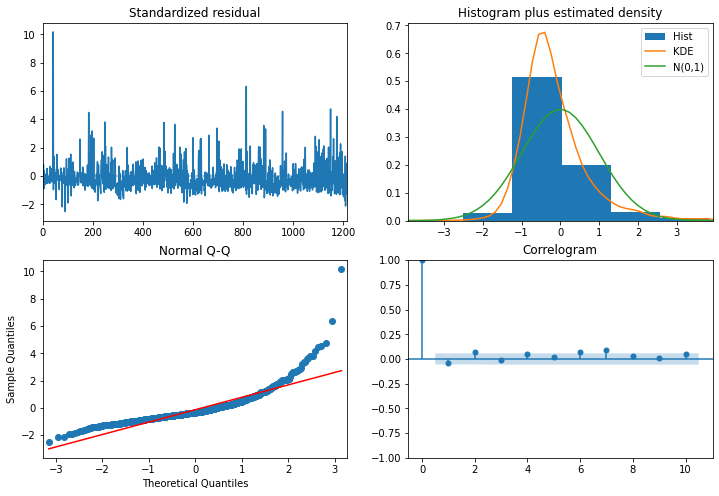

In [21]:
model.plot_diagnostics();

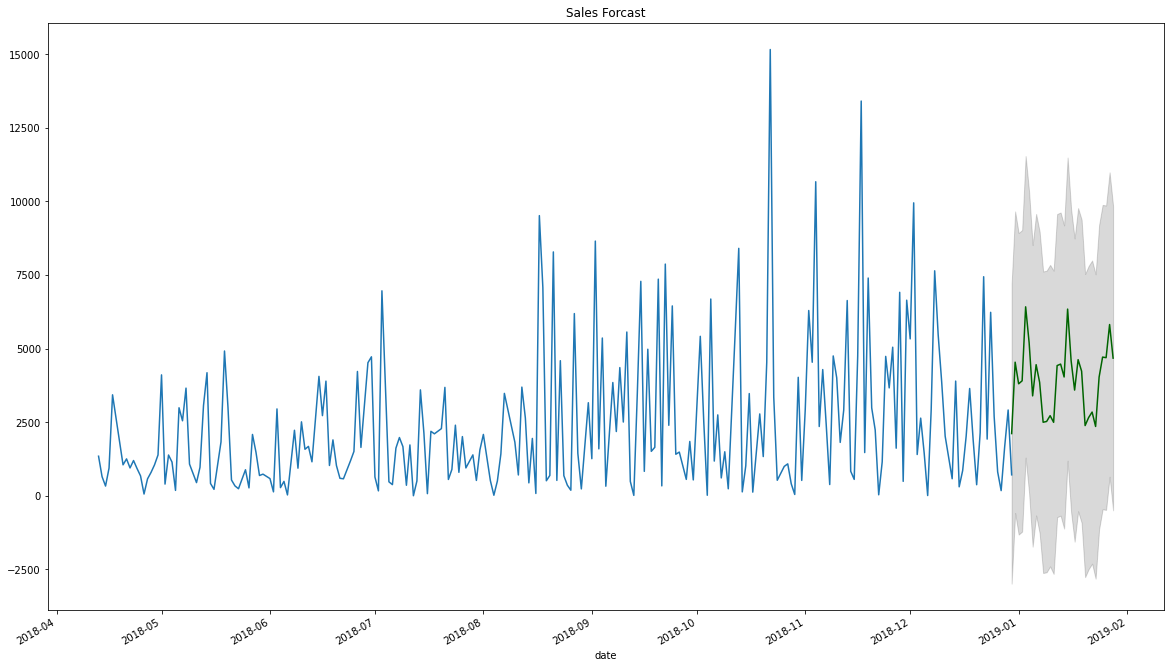

In [22]:
n=30

forecast,conf_int=model.predict(30,return_conf_int=True)
forcast_index=pd.date_range(data.index[-1],periods=n,freq="D")
 
forcasted=pd.Series(forecast,index=forcast_index)
lower=pd.Series(conf_int[:,0],index=forcast_index)
upper=pd.Series(conf_int[:,1],index=forcast_index)

plt.title("Sales Forcast")
data["Sales"][-240:].plot(figsize=(20,12))
forcasted.plot(color="darkgreen")
plt.fill_between(lower.index,lower,upper,color="k",alpha=0.15)

**Fb Prophet**

In [23]:
pip install prophet

     |████████████████████████████████| 65 kB 497 kB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 49 kB 1.4 MB/s            
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=9432266 sha256=4bbe2b0678a4a25131e91bc22dfdb18d51fa62aa4386d0b031d9f2da21f23497
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [24]:
from prophet import Prophet

In [25]:
data.reset_index(inplace=True)

In [26]:
data=data[['date','Sales']]
data.rename(columns={"date":"ds","Sales":"y"},inplace=True)
data.head()

,ds,y
0,2015-01-03,16.448
1,2015-01-04,288.060
2,2015-01-05,19.536
3,2015-01-06,4407.100
4,2015-01-07,87.158


In [27]:
import itertools

param_grid={"seasonality_prior_scale":[0.001,0.01,0.1,0.5],
            "changepoint_prior_scale":[0.01,0.1,1,10]}

all_params=[dict(zip(param_grid.keys(),v)) for v in itertools.product(*param_grid.values())]

In [28]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [29]:
rmse=[]

for params in all_params:
    model=Prophet(weekly_seasonality=False,**params)
    model.add_seasonality(name="monthly",period=30.5,fourier_order=5)
    model.fit(data)
    cv=cross_validation(model,horizon="30 days",initial="180 days",parallel="processes")
    pm=performance_metrics(cv)
    rmse.append(pm["rmse"].values[0])

Initial log joint probability = -7.67724
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2489.04    1.6483e-05       394.841           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2489.11    2.4128e-06       398.804       1.383      0.3004      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       2489.11   3.01109e-08       434.838      0.6545      0.6545      287   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -2.67521
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       274.213    0.00029195       476.385     0.05988           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    

In [30]:
best_params=all_params[np.argmin(rmse)]
print(best_params)

{'seasonality_prior_scale': 0.01, 'changepoint_prior_scale': 0.1}


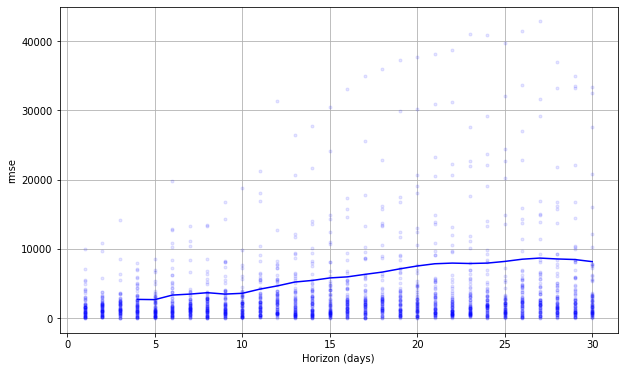

In [31]:
plot_cross_validation_metric(cv,metric="rmse");

In [32]:
model=Prophet(weekly_seasonality=False,**best_params)
model.add_seasonality(name="monthly",period=30.5,fourier_order=5)
model.fit(data)

Initial log joint probability = -7.67724


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      57       2539.37   6.23754e-05       24.5789   2.065e-06       0.001      108  LS failed, Hessian reset 
      71       2539.37   2.66735e-09       27.7187   0.0005309      0.5305      131   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


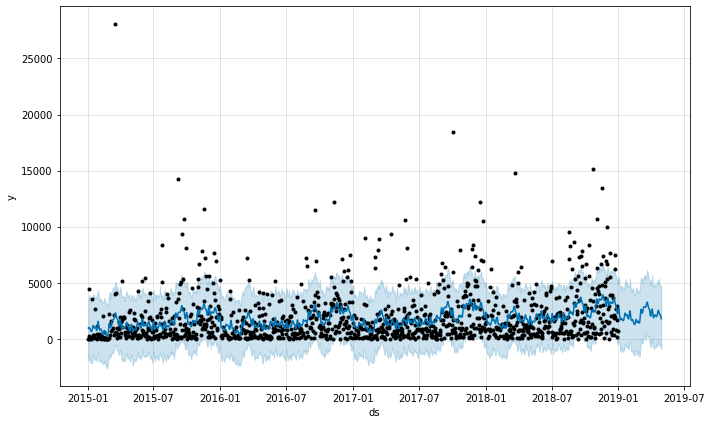

In [33]:
future=model.make_future_dataframe(periods=120,freq="D")
forecast=model.predict(future)

model.plot(forecast);

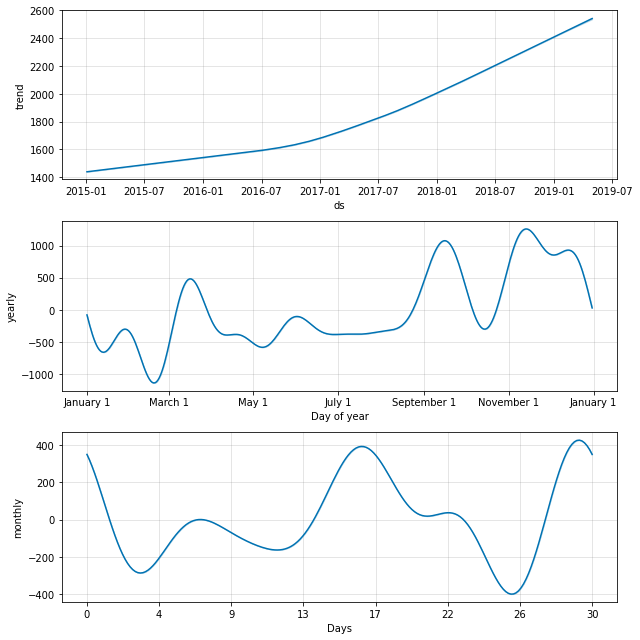

In [34]:
model.plot_components(forecast);